In [69]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6.4 * 2, 4.8 * 2)
plt.rcParams['font.size'] = 18

In [70]:
import numpy as np

def plot_regret(df, label):
    plt.semilogx(df.maximum_reward - df.reward, label=label)
    
def plot_percentage_optimal_actions(df, label):
    plt.semilogx(df.best_actions / df.total_actions, label = label)
    
def plot_bounds(df, family, m, style, upper_ucb=False, upper_fyl=False, lower=False):
    n = np.arange(1, len(df) + 1)
    beta = 0.767479
    
    if upper_fyl:
        d = 0.2 * (2 * m - 1 + 2 * m / (4 * beta - 1) * (1 + 1 / ((4 * beta - 1) * np.log(1 / beta))))
        plt.plot(8 * np.log(n) / 0.2 + d, "r:", label="m={}, upper bound FYL".format(m))

    if upper_ucb:
        b = 0.2 * m * (2 / (4 * beta - 1) + 2 / ((4 * beta - 1) ** 2 * np.log(1 / beta)))
        plt.plot((m - 1) * (8 * np.log(n) / 0.2 + 0 * 0.2) + b, "r:", label="m={}, upper bound UCB-Network".format(m))

    if lower:
        kl = 0.5 * np.log(0.5 / 0.7) + 0.5 * np.log(0.5 / 0.3)
        delta = 0
        plt.plot((1 - delta) / (1 + delta) * 0.2 / kl * np.log(n), "r--", label="m={}, lower bound NAIC-policy".format(m))

# Experiment 1

In [110]:
UCBStar = pd.read_csv("experiment-1/UCBStar.txt", sep = " ")
UCBFC = pd.read_csv("experiment-1/UCBFC.txt", sep = " ")
UCBFD = pd.read_csv("experiment-1/UCBFD.txt", sep = " ")
UCBCircular = pd.read_csv("experiment-1/UCBCircular.txt", sep = " ")

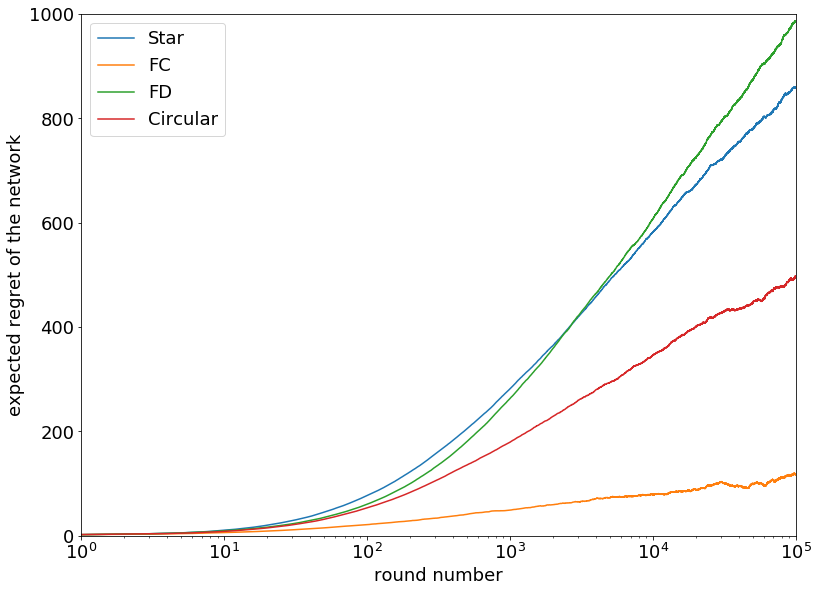

In [111]:
plot_regret(UCBStar, "Star")
plot_regret(UCBFC, "FC")
plot_regret(UCBFD, "FD")
plot_regret(UCBCircular, "Circular")
plt.xlabel("round number")
plt.ylabel("expected regret of the network")
plt.legend()
plt.xlim((1, 100000))
plt.ylim((0, 1000))
plt.show()

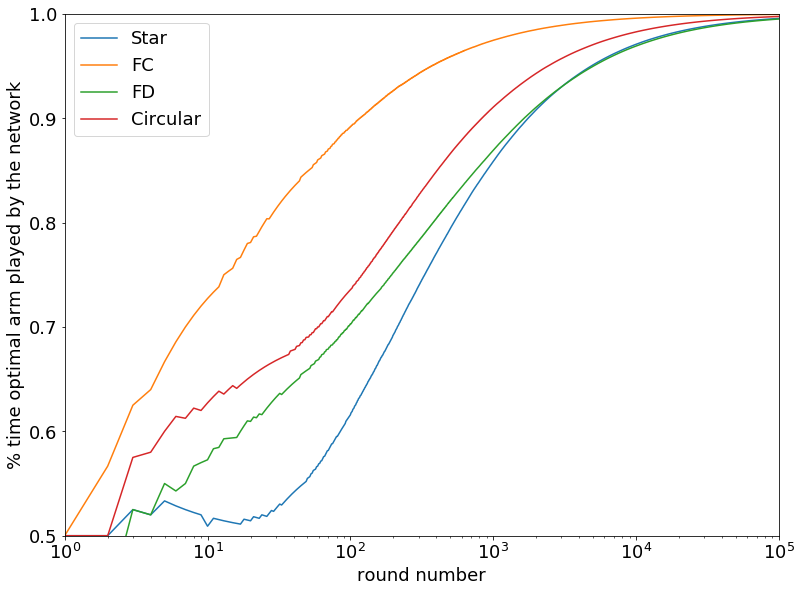

In [112]:
plot_percentage_optimal_actions(UCBStar, "Star")
plot_percentage_optimal_actions(UCBFC, "FC")
plot_percentage_optimal_actions(UCBFD, "FD")
plot_percentage_optimal_actions(UCBCircular, "Circular")
plt.xlabel("round number")
plt.ylabel("% time optimal arm played by the network")
plt.xlim((1, 100000))
plt.ylim((0.5, 1))
plt.legend()
plt.show()

# Experiment 2

In [119]:
UCBStar = pd.read_csv("experiment-2/UCBStar.txt", sep = " ")
UCBFC = pd.read_csv("experiment-2/UCBFC.txt", sep = " ")
UCBFD = pd.read_csv("experiment-2/UCBFD.txt", sep = " ")
UCBCircular = pd.read_csv("experiment-2/UCBCircular.txt", sep = " ")

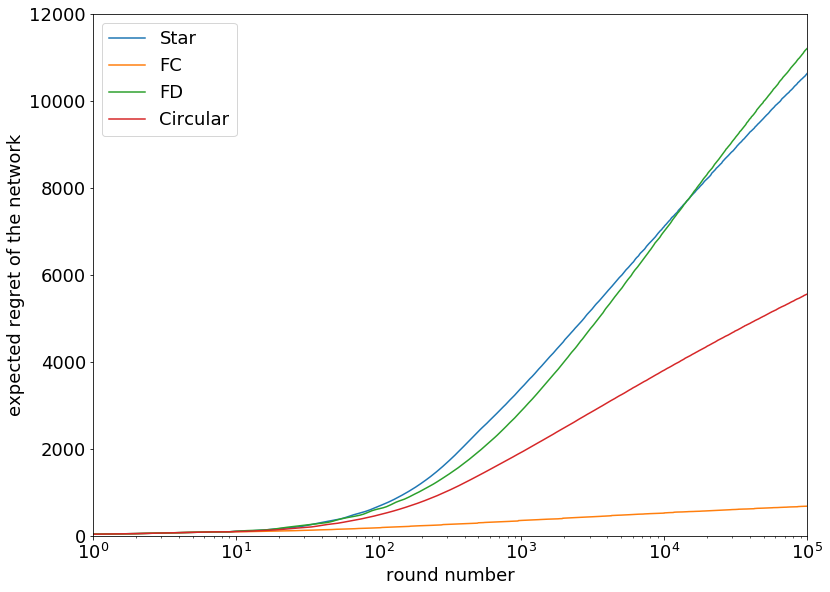

In [120]:
plot_regret(UCBStar, "Star")
plot_regret(UCBFC, "FC")
plot_regret(UCBFD, "FD")
plot_regret(UCBCircular, "Circular")
plt.xlabel("round number")
plt.ylabel("expected regret of the network")
plt.xlim((1, 100000))
plt.ylim((0, 12000))
plt.legend()
plt.show()

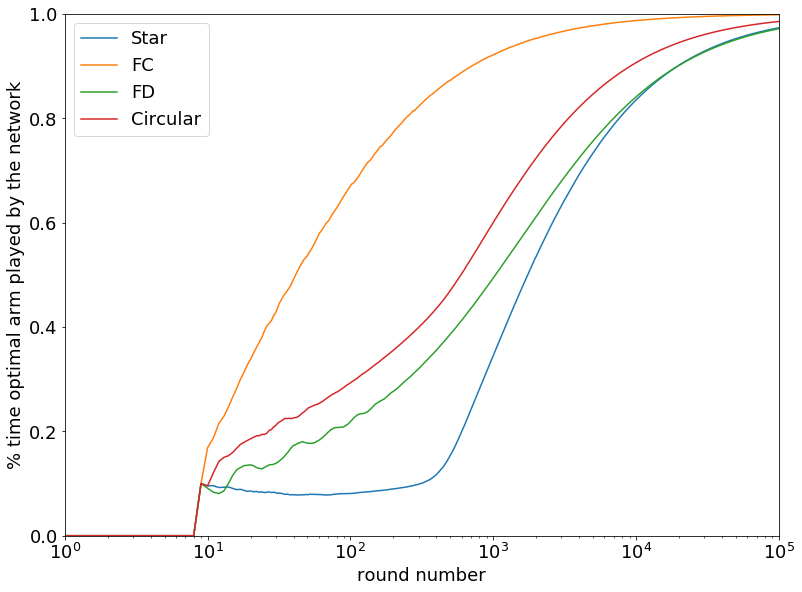

In [121]:
plot_percentage_optimal_actions(UCBStar, "Star")
plot_percentage_optimal_actions(UCBFC, "FC")
plot_percentage_optimal_actions(UCBFD, "FD")
plot_percentage_optimal_actions(UCBCircular, "Circular")
plt.xlabel("round number")
plt.ylabel("% time optimal arm played by the network")
plt.xlim((1, 100000))
plt.ylim((0., 1))
plt.legend()
plt.show()

# Experiment 3

In [ ]:
FYL25 = pd.read_csv("experiment-3/FYL25.txt", sep = " ")
UCB25 = pd.read_csv("experiment-3/UCB25.txt", sep = " ")

FYL100 = pd.read_csv("experiment-3/FYL100.txt", sep = " ")
UCB100 = pd.read_csv("experiment-3/UCB100.txt", sep = " ")

FYL350 = pd.read_csv("experiment-3/FYL350.txt", sep = " ")
UCB350 = pd.read_csv("experiment-3/UCB350.txt", sep = " ")

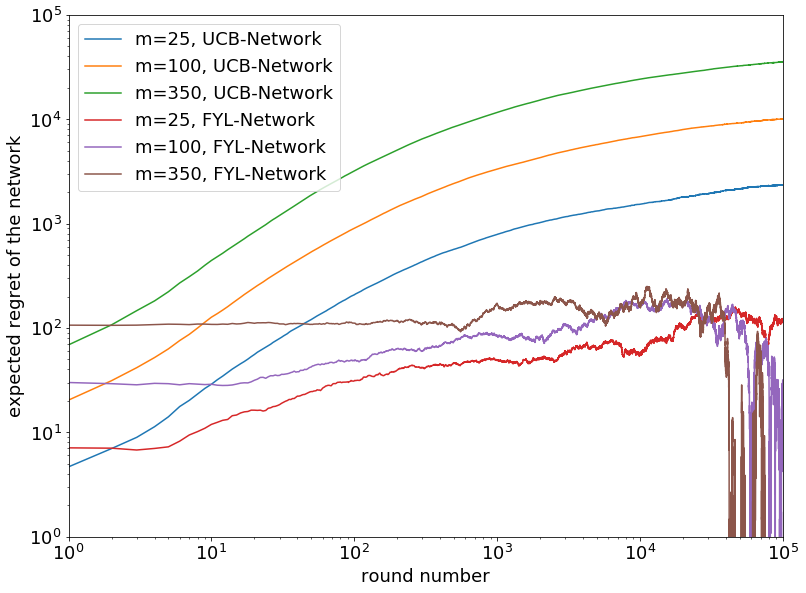

In [99]:
plot_regret(UCB25, "m=25, UCB-Network")
plot_regret(UCB100, "m=100, UCB-Network")
plot_regret(UCB350, "m=350, UCB-Network")

plot_regret(FYL25, "m=25, FYL-Network")
plot_regret(FYL100, "m=100, FYL-Network")
plot_regret(FYL350, "m=350, FYL-Network")

# plot_bounds(FYL25, 'star', 25, 'r:', upper_ucb=True, upper_fyl=True, lower=True)

plt.xlabel("round number")
plt.ylabel("expected regret of the network")
plt.yscale("log")
plt.xlim((1, 100000))
plt.ylim((1, 100000))
plt.legend()

plt.show()

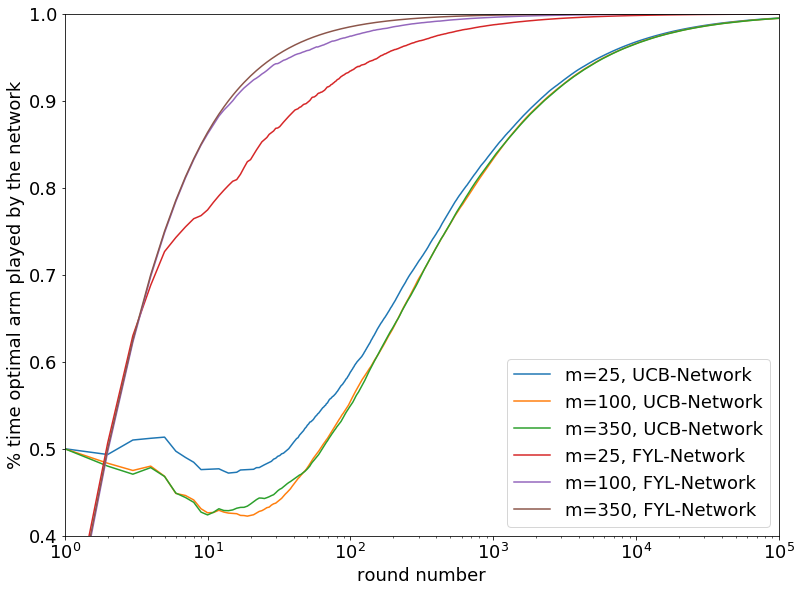

In [100]:
plot_percentage_optimal_actions(UCB25, "m=25, UCB-Network")
plot_percentage_optimal_actions(UCB100, "m=100, UCB-Network")
plot_percentage_optimal_actions(UCB350, "m=350, UCB-Network")

plot_percentage_optimal_actions(FYL25, "m=25, FYL-Network")
plot_percentage_optimal_actions(FYL100, "m=100, FYL-Network")
plot_percentage_optimal_actions(FYL350, "m=350, FYL-Network")

plt.xlabel("round number")
plt.ylabel("% time optimal arm played by the network")
plt.xlim((1, 100000))
plt.ylim((0.4, 1))
plt.legend()

plt.show()